<h1>Question 1</h1>
<linebreak>
<div style="margin-top:15px;">Write a program that considers a set of images and given an image finds from the set of images the k most colour similar images. First, consider calculating for each image the most frequent colours and then compare them using a distance measure (e.g. Euclidean). Demonstrate your algorithm on a set of images of your preference.</div>
<linebreak>
<h2>A quick review of my solution</h2>
<linebreak>
<div style="margin-top:15px;">
    <li>Load Dataset.</li>
    <li>I used the original pokemon images as a dataset in order to have many images in acceptable resolution to avoid long runtimes.</li>
    <li>Use k-means to calculate the k most frequent colors of each image.</li>
    <li>Calculate the Euclidean distance between the chosen image and the rest of the dataset.</li>
    <li>Display the n-most-similar images.</li>
</div>
<linebreak>
<h1>Step by step solution</h1>
<linebreak>
<h3 style="margin-top:15px;">Import the necessary libraries and suppress warnings</h3>

In [1]:
import glob
import warnings
import itertools
import numpy as np
from PIL import Image
from IPython.display import display
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

<h3 style="margin-top:15px;">Load the dataset</h3>
<breakline>
<div style="margin-top:10px;">To do so the function load_data is implemented.</div>

In [2]:
# Function to load the dataset
def load_data(url):
    image_list = []
    url = url + '/*.png'
    for filename in glob.glob(url):
        image_list.append(Image.open(filename))
    return image_list

<div style="margin-top:0px;">Then the dataset is loaded by specifing it's relative location by URL.</div>

In [3]:
# Import Images from location
images_location = './images_question1'
image_list = load_data(images_location)
n_images = len(image_list)

<div style="margin-top:0px;">Check whether the dataset was loaded.</div>

The dataset contains 151 images.
Sample image:


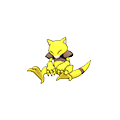

In [4]:
print('The dataset contains '+str(len(image_list))+' images.\nSample image:')
display(image_list[0])

<h3 style="margin-top:15px;">Define parameters.</h3>
<breakline>
<div style="margin-top:10px;">Here we can choose the image for which we will find the similar images and the number of similar images that will be retrieved.</div>

In [5]:
# Important parameters
image_number = 0
number_of_similar_images = 5

<h3 style="margin-top:15px;">Use k-means to calculate the k most frequent colors of each image.</h3>
<breakline>
<div style="margin-top:10px;">First, the function that calculates the clustering for one image is implemented</div>

In [6]:
# Function to get the n-most frequent colors of an image
def get_freq_colors(img, n_cl):
    w, h = img.size  
    colors = img.convert('RGBA').getcolors(w*h) #.convert('RGB')
    n_colors = len(colors[0][1])
    color_list = list([])
    for color_tuple in colors:
        for i in range(color_tuple[0]):
            color_list.extend(color_tuple[1])
    colors = np.asarray(color_list).reshape(w*h, n_colors)
    clustering = KMeans(n_clusters=n_cl).fit(colors)
    return clustering.cluster_centers_

<div style="margin-top:10px;">Then call the function for each image and create a list containing each clustering.</div>

In [7]:
# Calculate k-most frequent colors in each image using k-means
n_cl = 3
all_centers = list([])
for i in range(n_images):
    centers = get_freq_colors(image_list[i], n_cl)
    all_centers.append(centers)

<div style='margin-top:10px;'>Let's have a look at the k-most frequent colors obtained for some pictures.</div>
<breakline>
<div style='margin-top:10px;'>To do so the create_colors_image function is implemented and called for the first image.</div>

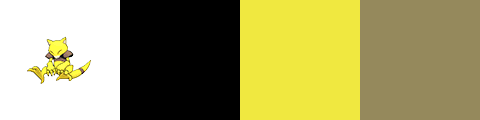

In [8]:
def create_colors_image(image, colors):
    size = 120
    colors_image = Image.new('RGBA', (size*(len(colors)+1), size))
    x_offset = 0
    colors_image.paste(image, (x_offset,0))
    x_offset += size
    for i in range(len(colors)):
        color = Image.new("RGB", (size, size), tuple([int(np.round(c)) for c in colors[i]]) )
        colors_image.paste(color, (x_offset,0))
        x_offset += size
    return colors_image

display( create_colors_image(image_list[image_number], all_centers[image_number]) )

<h3 style="margin-top:15px;">Find the most similar images in the dataset for the chosen image.</h3>
<breakline>
<div style="margin-top:10px;">To do so, we need a function that calculates the distance between two given clusterings.</div>
<breakline>
<div style="margin-top:0px;">The function get_distance calculates the distance of 2 clusterings by calculating the norm (euclidean) between every permutation of one of the clusterings and the second one. The minimum norm is returned as the distance between these 2 clusterings</div>

In [9]:
# Function to calculate the distance between 2 clusterings
def get_distance(c1, c2):
    all_permutations = list(itertools.permutations(c2))
    min_dist = np.inf
    for permutation in all_permutations:
        d = np.linalg.norm(c1-permutation)
        if d < min_dist:
            min_dist = d
    return min_dist

The function is used to calculate the distance of the given image from the rest of the dataset and the results are saved in a matrix.

In [10]:
# Calculate the distance of the image from the rest
distances = list([])
for i in range(n_images):
    dist = get_distance(all_centers[image_number], all_centers[i])
    distances.append(dist)

Our next step is to calculate which are the most similar images according to the calculated distances.
<breakline>
The similarity_search function is implemented that sorts the distances and returns the indices of the n-most similar images.

In [11]:
# Function that finds the k most similar images given the distances
def similarity_search(distances, k):
    indices = [i for i in range(len(distances))]
    sorting = np.argsort(distances)
    sorted_distances = np.zeros(len(sorting), dtype = float) 
    sorted_indices = np.zeros(len(sorting), dtype = int)
    for i in range(len(distances)):
        sorted_distances[i] = distances[sorting[i]]
        sorted_indices[i] = indices[sorting[i]]
    return sorted_indices[1:(k+1)]

# Find the most similar images of the dataset.
indices = similarity_search(distances, number_of_similar_images)

At this point the n-most similar images of the given image are known and we just have to present them.
<breakline>
To do this, the show_similar_images function is implemented that shows as 1 image the n-most similar images.

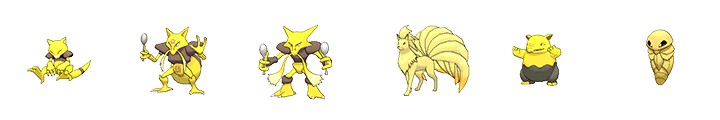

In [12]:
# Function to present the n-most similar images as one image.
def show_similar_images(image, image_list, indices):
    size = 120
    images = Image.new('RGBA', (size*(len(indices)+1), size))
    x_offset = 0
    images.paste(image, (x_offset,0))
    x_offset += size
    for i in indices:
        images.paste(image_list[i], (x_offset,0))
        x_offset += size
    display(images)
    
# Show original Image and the results
show_similar_images(image_list[image_number], image_list, indices)

Finally, lets take one last look at the most frequent colors of each image to understand whether the results are the expected ones.

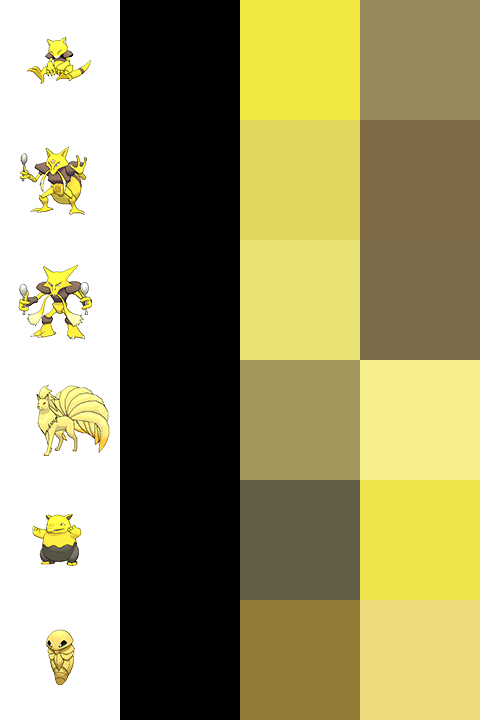

In [13]:
# Show colors of each image
size = 120
results = Image.new('RGBA', (size*(n_cl + 1), size*(number_of_similar_images + 1)))
y_offset = 0
temp = create_colors_image(image_list[image_number], all_centers[image_number])
results.paste(temp, (0, y_offset))
y_offset += size
for i in indices:
    temp = create_colors_image(image_list[i], all_centers[i])
    results.paste(temp, (0, y_offset))
    y_offset += size
display(results)

Feel free to change the parameters in order to explore other images and their most similar images in the dataset.
<breakline>
<h3>Notes</h3>
<breakline>
<li>It was observed that the best results were given with k=3</li>
<li>Other clustering methods can be used instead of k-means, like DBSCAN but in that case since the number of clusters cannot be chosen from the beginning we should come up with a way of combining clusters if they are more than the chosen number.</li>
<li>In several cases the DBSCAN or other clustering algorithms are bound to present different/better results but this depends on the nature of the dataset as well. After some experiments I chose the k-means algorithm because it presented better results at least on the human eye.</li>
